In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Change working directory to the data folder
path = os.path.join(os.getcwd(), 'data')
os.chdir(path)

Importing the data.

In [3]:
date_time = pd.read_csv('date_time.csv')
stations = pd.read_csv('stations.csv')

In [7]:
# Uncomment to reate zip files
# date_time.to_csv('date_time.csv.gz', index=False, compression='gzip')
# stations.to_csv('stations.csv.gz', index=False, compression='gzip')

Take a quick look at the date_time table.

In [4]:
date_time.head()

,member_casual,started_at,month,n_month,day,n_day_week,n_day_month,start_time,ride_duration,rideable_type
0,member,2024-05-01 08:18:00 UTC,MAY,5,WEDNESDAY,4,1,8.18,6,electric_bike
1,casual,2024-05-01 18:56:04 UTC,MAY,5,WEDNESDAY,4,1,18.56,6,electric_bike
2,member,2024-05-27 11:37:24 UTC,MAY,5,MONDAY,2,27,11.37,5,electric_bike
3,casual,2024-05-19 19:02:00 UTC,MAY,5,SUNDAY,1,19,19.02,2,electric_bike
4,member,2024-05-25 12:59:28 UTC,MAY,5,SATURDAY,7,25,12.59,25,electric_bike


In [14]:
round(date_time.describe(), 2)

,n_month,n_day_week,n_day_month,start_time,ride_duration
count,5703370.00,5703370.00,5703370.00,5703370.00,5703370.00
mean,6.99,4.09,15.67,14.34,14.89
std,2.71,2.00,8.77,4.89,22.51
min,1.00,1.00,1.00,0.00,0.00
25%,5.00,2.00,8.00,11.09,6.00
50%,7.00,4.00,16.00,15.22,10.00
75%,9.00,6.00,23.00,18.06,17.00
max,12.00,7.00,31.00,23.59,1439.00


In [5]:
date_time.shape

(5703370, 10)

In [6]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703370 entries, 0 to 5703369
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   member_casual  object 
 1   started_at     object 
 2   month          object 
 3   n_month        int64  
 4   day            object 
 5   n_day_week     int64  
 6   n_day_month    int64  
 7   start_time     float64
 8   ride_duration  int64  
 9   rideable_type  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 435.1+ MB


Create a G class to store all the global variables.

In [4]:
class G:
    m = 'member'
    c = 'casual'
    m_col = '#39b837'
    c_col = '#c42356'
    total_rides = date_time.shape[0]
    m_rides = date_time[date_time['member_casual'] == 'member'].shape[0] # Number of member rides
    c_rides = date_time[date_time['member_casual'] == 'casual'].shape[0] # Number of casual rides

In [28]:
print(f'Total rides: {G.total_rides}')
print(f'Member rides: {G.m_rides}')
print(f'Casual rides: {G.c_rides}')
print(f'Member rides percentage: {round(G.m_rides / G.total_rides * 100, 2)}%')
print(f'Casual rides percentage: {round(G.c_rides / G.total_rides * 100, 2)}%')

Total rides: 5703370
Member rides: 3673707
Casual rides: 2029663
Member rides percentage: 64.41%
Casual rides percentage: 35.59%


### Monthly engagement.

In [5]:
# Create a month table which contains the number of rides per month for each user type.
month = date_time.loc[:, ['member_casual', 'month', 'n_month']]
month = month.groupby(['member_casual', 'month', 'n_month']).size()
month = month.reset_index().sort_values(['n_month'])

**Note :** The graph below must not be confused with time series data, as the bars are not sorted by chronoligical order given that our data start from July 2023.<br>
The point of this visualization is to highlight the riding patterns during different months.

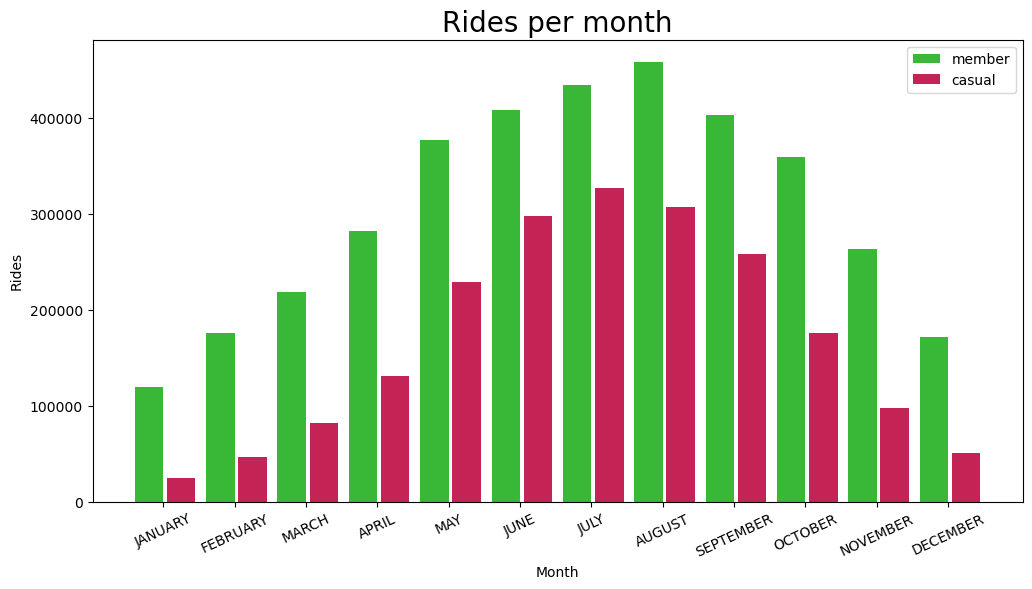

In [37]:
x = month['n_month'].unique()
labels = month['month'].unique()
member_count = month[0][month['member_casual'] == 'member']
casual_count = month[0][month['member_casual'] == 'casual']


plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.25, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Month')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per month', fontsize=20)
#plt.savefig('month.png')
plt.show()

**Comment :** Members and casuals have similar distributions for months, meaning that weather and season have similar effects on both groups.

### Weekly engagement

In [6]:
# Create a week table which contains the number of rides per week for each user type.
week = date_time.loc[:, ['member_casual', 'day', 'n_day_week']]
week = week.groupby(['member_casual', 'day', 'n_day_week']).size()
week = week.reset_index().sort_values(['n_day_week'])

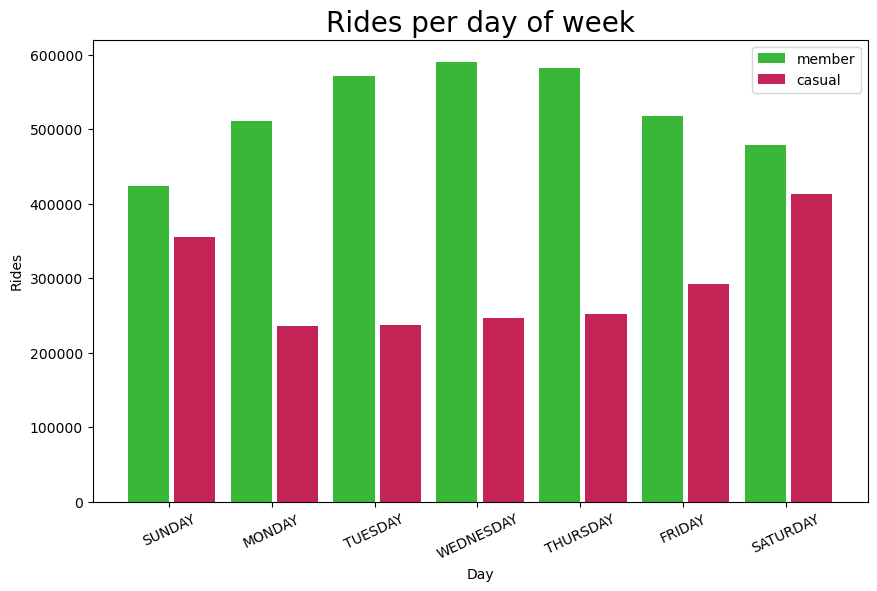

In [7]:
x = week['n_day_week'].unique()
labels = week['day'].unique()
member_count = week[0][week['member_casual'] == 'member']
casual_count = week[0][week['member_casual'] == 'casual']


plt.figure(figsize=(10, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.25, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Day')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per day of week', fontsize=20)
#plt.savefig('day.png')
plt.show()

#### Weekends vs weekdays.

In [8]:
v = (date_time['day'] == 'SATURDAY') | (date_time['day'] == 'SUNDAY')
weekend = date_time[v]
weekday = date_time[-v]
weekend_m = weekend[weekend['member_casual'] == G.m]
weekday_m = weekday[weekday['member_casual'] == G.m]
weekend_c = weekend[weekend['member_casual'] == G.c]
weekday_c = weekday[weekday['member_casual'] == G.c]

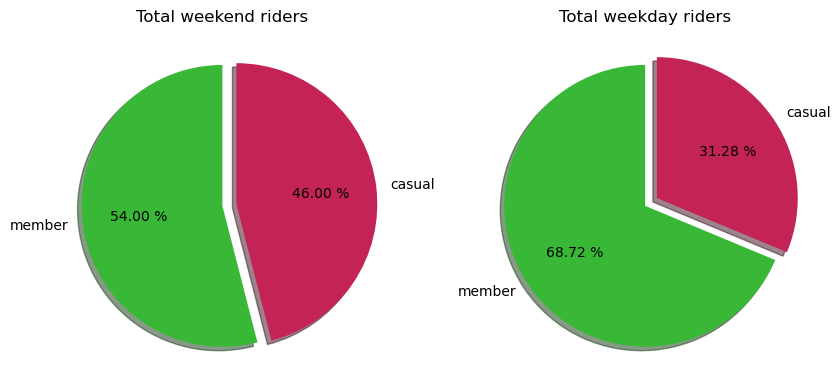

In [9]:
w = round(weekend.value_counts(weekend['member_casual'], normalize=True), 4) * 100
m = round(weekday.value_counts(weekday['member_casual'], normalize=True), 4) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), dpi=100)

ax1.pie(w, 
        labels=w.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True )

ax1.set_title('Total weekend riders')

ax2.pie(m, 
        labels=m.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True)

ax2.set_title('Total weekday riders')

#plt.savefig('daytype.png')
plt.show()

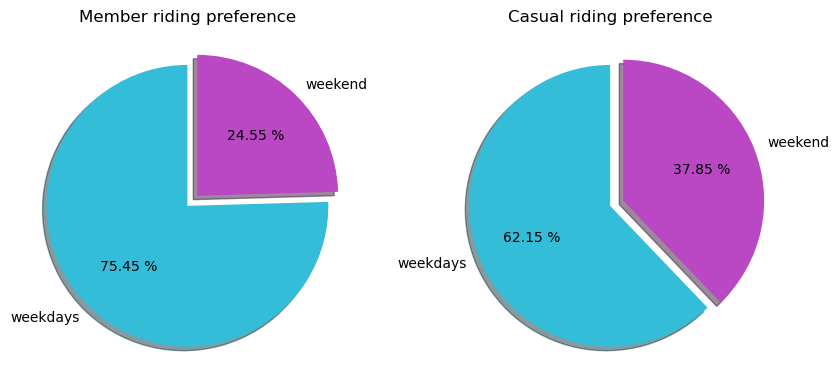

In [10]:
m_m = round(weekday_m.shape[0] / G.m_rides, 4) * 100 # members midweek
m_w = round(weekend_m.shape[0] / G.m_rides, 4) * 100 # members weekend etc
c_w = round(weekend_c.shape[0] / G.c_rides, 4) * 100
c_m = round(weekday_c.shape[0] / G.c_rides, 4) * 100

proportions = pd.DataFrame([[m_m, m_w],
                            [c_m, c_w] ], 
                            index=[G.m, G.c],
                            columns=['weekday', 'weekend'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), dpi=100) 

ax1.pie(proportions.loc[G.m], 
        labels=['weekdays', 'weekend'], 
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True
        )
ax1.set_title('Member riding preference')

ax2.pie(proportions.loc[G.c],
        labels=['weekdays', 'weekend'],
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True)
ax2.set_title('Casual riding preference')

#plt.savefig('preference.png')
plt.show()

**Comment :** The weekly trends tell an interesting story. Here members seem to have a strong preferance to riding on weekdays. This is a sign that for many of them bike is a means of transportation for their every day activities. <br>
On the other hand, casual rides peak at the weekend signaling that for most of them bike is a means of leisure and tourist activities. But their overall preference chart suggests that besides all the tourists and one-time visitors in the city of Chicago, there might be an interesting pool of casuals, which exhibit similar behavior as members, from which we can draw potential new members.  

### Hourly engagement

In [11]:
# Create an hour table which contains the number of rides per hour in a day for each user type.
hour = date_time.loc[:, ['member_casual', 'start_time']]

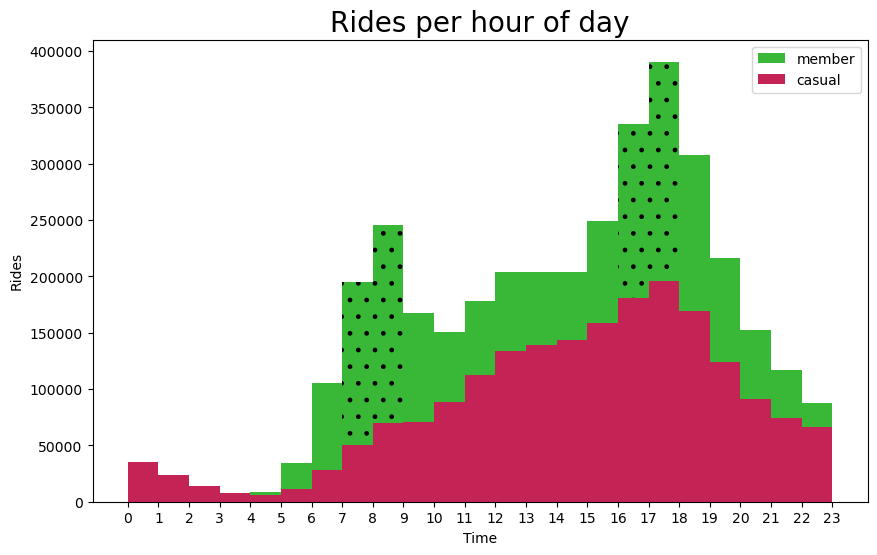

In [12]:
member = hour[hour['member_casual'] == G.m]
casual = hour[hour['member_casual'] == G.c]

plt.figure(figsize=(10, 6), dpi=100)

bins=np.arange(24)

counts, edges, bars = plt.hist(member['start_time'],bins=bins, color=G.m_col, label=G.m) 
plt.hist(casual['start_time'],bins=bins, color=G.c_col, label=G.c)
plt.xticks(ticks=bins)

bars[7].set_hatch('.')
bars[8].set_hatch('.')
bars[16].set_hatch('.')
bars[17].set_hatch('.')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Rides')
plt.title("Rides per hour of day", fontsize=20)
#plt.savefig('hour.png')
plt.show()

**Comment :** In this graph the doted hists show a local peak that is repeated exactly after 8 hours, suggesting clearly that many members ride their way to work/school/university etc and back.<br>
Members on the other side, peak smoothly in the afternoon hours.

### Riding duartions

In [31]:
# Create a table that contains only membership status and rie duration.
duration = date_time.loc[:, ['member_casual', 'ride_duration']]

**Note :** For this section it might be reasonable to omit the entries with ride duration smaller than a minute and over 12 hours.<br>
This decision has to do with the fact that most of these entries have likely occured due to some problematic reason (eg. system malfunction, user mistake etc.) and they do not add value to behavioural insights.

In [32]:
duration = date_time.loc[:, ['member_casual', 'ride_duration']]
duration = duration[(duration['ride_duration'] >= 1.0) & (duration['ride_duration'] <= 720.0)]
m_d = duration[duration['member_casual'] == 'member']
c_d = duration[duration['member_casual'] == 'casual']

In [47]:
print(f"Average Member ride duration : {round(m_d['ride_duration'].mean(), 2)} min")
print(f"Average Casual ride duration : {round(c_d['ride_duration'].mean(), 2)} min")

Average Member ride duration : 12.17 min
Average Casual ride duration : 20.18 min


In [58]:
print(' members', round(m_d.describe(), 2),'\n\n', 'casuals', round(c_d.describe(), 2))

 members        ride_duration
count     3624986.00
mean           12.17
std            14.79
min             1.00
25%             5.00
50%             9.00
75%            15.00
max           713.00 

 casuals        ride_duration
count     1997803.00
mean           20.18
std            27.09
min             1.00
25%             7.00
50%            12.00
75%            23.00
max           716.00


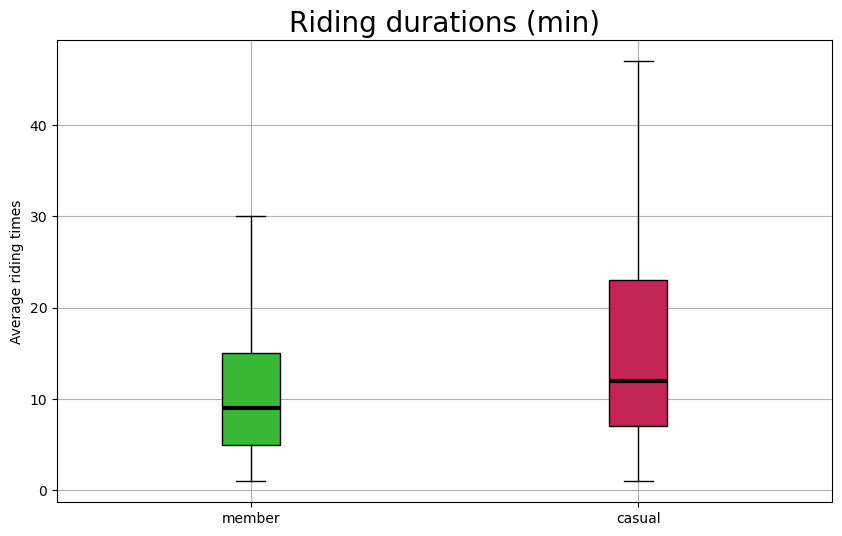

In [45]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.set_ylabel('Average riding times')
arrays = [np.array(m_d['ride_duration']), np.array(c_d['ride_duration'])]
bplot = ax.boxplot(arrays,
                   showfliers=False,
                   patch_artist=True)
colors = [G.m_col, G.c_col]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set(color ='black',
               linewidth = 3)
ax.set_xticklabels([G.m, G.c])
plt.grid()
plt.title('Riding durations (min)', fontsize=20)
#plt.savefig('duration.png')    
plt.show()

**Comment :** Here is another interesting insight. Casuals tend to take longer rides than members, making the utilitarian versus leisure riding arguement even stronger.

### Bike type preference

In [13]:
# Create a table that contains only membership status and bike type.
rideable = date_time.loc[:, ['member_casual', 'rideable_type']]

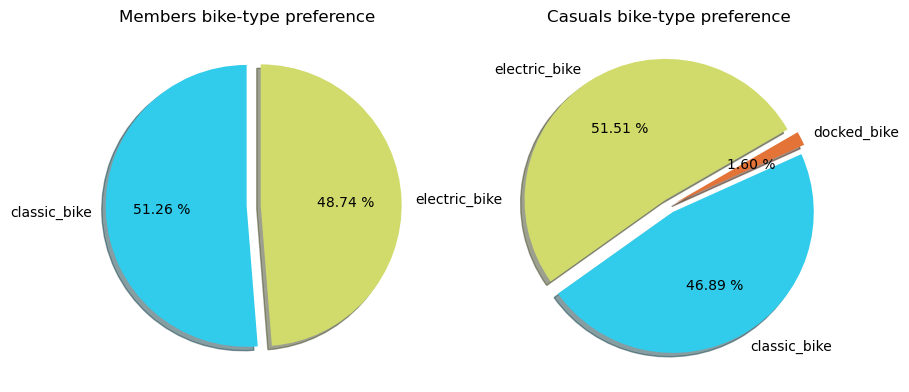

In [14]:
r_m = round(rideable[rideable['member_casual'] == G.m].value_counts(normalize=True), 4) * 100
r_c = round(rideable[rideable['member_casual'] == G.c].value_counts(normalize=True), 4) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), dpi=100)
# Plot data on the first subplot
ax1.pie(r_m, 
        labels=r_m.reset_index()['rideable_type'], 
        colors=['#31cceb', '#d0db6b'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True )
ax1.set_title('Members bike-type preference')

# Plot data on the second subplot
ax2.pie(r_c, 
        labels=r_c.reset_index()['rideable_type'], 
        colors=['#d0db6b', '#31cceb', '#e37336'],
        autopct='%.2f %%',
        explode=[0.051, 0.05, 0.05],
        startangle=30,
        shadow=True
        )
ax2.set_title('Casuals bike-type preference')

#plt.savefig('biketype.png')
plt.show()

**Comment :** The graphs suggest that there is no notable difference between the bike-type preferences of the two groups.

### Feature importance

It is a good idea to use some machine learning to check some of our insights or even gain some new ones.<br><br>
In this case we can benefit from a simple Random Forest classifier that has the ability to assign an importance score to each feature 
in the training set.<br><br>
We begin by defining a new dataset that consists only of the numerical represantations for months.<br> The days column is replaced by a column that indicates where the ride took place on the weekend or not. This also help reduces helps the model to not perceive days as a categorical feature.<br> The rideable_type feature will aslo be excluded because, as we saw earlier, casuals and members have almost identical distributions. So keeping it would only add unnecessary complexity to the model.<br> 
Lastly, we exclude some extreme values and outliers from ride_duration to reduce their impact on the learning process.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

forest_data = date_time.loc[:, ['member_casual', 'n_month',  'start_time',  'ride_duration']]
forest_data = forest_data[(forest_data['ride_duration'] > 0.3) & (forest_data['ride_duration'] < 720.0)]
forest_data['weekday'] = -v # weekend true or false vector

X_train, X_test, y_train, y_test = train_test_split(forest_data.drop('member_casual', axis=1),
                                forest_data['member_casual'],
                                test_size=5000, 
                                train_size=80000, 
                                random_state=6, 
                                shuffle=True,
                                stratify=forest_data['member_casual'])

le = LabelEncoder()
y_train, y_test = le.fit_transform(y_train), le.fit_transform(y_test) # Encode the member_casual feature

First lets bulid a dummy classifier that blindly guesses the most frequent class, in order to get a baseline result.

In [87]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf = dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.6446

Now let's train several classifiers thruogh Grid Search, and use cross validation to get the best hyperparameter combination.

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[600, 800],
        'max_features':[2, 3, 4],
        'min_samples_leaf':[10, 15],
        'min_samples_split':[50, 100]}

rfc = GridSearchCV(RandomForestClassifier(),
                param_grid=params, 
                cv=3)

rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.6738

In [78]:
print(rfc.best_estimator_)

RandomForestClassifier(max_features=3, min_samples_leaf=15,
                       min_samples_split=100, n_estimators=600)


In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(n_estimators=700, max_features=3, min_samples_leaf=20, min_samples_split=120)

rfc_1 = rfc_1.fit(X_train, y_train)
rfc_1.score(X_test, y_test)

0.6744

The models' performance is mediocre, and it seems that it could benefit by scaling both the training set size and its' hyperparameters.<br>
But, let's look at which are the most important features that our model has 'learned'.

In [89]:
for score, feature in zip(rfc_1.feature_importances_, rfc_1.feature_names_in_):
    print(f'Importance of {feature} : {round(score, 3)}')

Importance of n_month : 0.135
Importance of start_time : 0.355
Importance of ride_duration : 0.409
Importance of weekday : 0.102


The model seems to recognize ride_duration and start_time as the most important features for choosing between a member and a casual. On the other side, days of the week do not seem to be of particular importance. Although these findings somehow confirm some of the trends we saw earlier in the graphs, there is a lot of room for improvement fot the model to be considered reliable.

### Stations

Let's take a look at the table.

In [9]:
stations.head(3)

,station,lat,long,num_of_start_rides,num_of_end_rides,start_member_rides,end_member_rides,start_casual_rides,end_casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
0,Halsted St & Fulton St,41.890,-87.65,18777,19301,12676,12914,6101,6387,8816,9961,0
1,Bissell St & Armitage Ave*,41.920,-87.65,11965,12743,8207,8432,3758,4311,4144,7821,0
2,Morgan St & Lake St*,41.883,-87.65,9984,10905,7183,7480,2801,3425,4269,5715,0


In [15]:
stations.shape

(1659, 12)

In [12]:
round(stations.describe(), 2)

,lat,long,num_of_start_rides,num_of_end_rides,start_member_rides,end_member_rides,start_casual_rides,end_casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
count,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00,1659.00
mean,41.86,-87.68,2877.59,2853.81,1860.57,1864.11,1017.02,989.70,1149.20,1708.77,19.62
std,0.09,0.06,6028.85,6006.87,3832.73,3841.56,2573.58,2575.68,2237.07,3833.66,86.89
min,41.65,-87.84,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,41.78,-87.72,14.00,14.00,4.00,4.00,8.00,7.00,12.00,0.00,0.00
50%,41.88,-87.68,90.00,83.00,37.00,35.00,48.00,44.00,64.00,4.00,0.00
75%,41.94,-87.64,2464.50,2509.00,1622.00,1610.00,786.00,764.50,1211.00,1193.50,9.00
max,42.06,-87.53,63714.00,64539.00,27791.00,28686.00,47257.00,50488.00,15565.00,46163.00,2067.00


In [16]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station              1659 non-null   object 
 1   lat                  1659 non-null   float64
 2   long                 1659 non-null   float64
 3   num_of_start_rides   1659 non-null   int64  
 4   num_of_end_rides     1659 non-null   int64  
 5   start_member_rides   1659 non-null   int64  
 6   end_member_rides     1659 non-null   int64  
 7   start_casual_rides   1659 non-null   int64  
 8   end_casual_rides     1659 non-null   int64  
 9   electric_bike_rides  1659 non-null   int64  
 10  classic_bike_rides   1659 non-null   int64  
 11  docked_bike_rides    1659 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 155.7+ KB


### Top destinations by user type

In [19]:
# Top member destinations
stations.sort_values('end_member_rides', ascending=False).head(3)

,station,lat,long,num_of_start_rides,num_of_end_rides,start_member_rides,end_member_rides,start_casual_rides,end_casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
784,Clinton St & Washington Blvd,41.88,-87.64,33965,34749,27791,28686,6174,6063,15565,18327,73
797,Kingsbury St & Kinzie St,41.89,-87.64,35450,34885,26731,26834,8719,8051,13301,22067,82
844,Clark St & Elm St,41.90,-87.63,35244,34602,24660,24667,10584,9935,12487,22616,141


In [20]:
# Top casual destinations
stations.sort_values('end_casual_rides', ascending=False).head(3)

,station,lat,long,num_of_start_rides,num_of_end_rides,start_member_rides,end_member_rides,start_casual_rides,end_casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
580,Streeter Dr & Grand Ave,41.89,-87.61,63714,64539,16457,14051,47257,50488,15484,46163,2067
849,DuSable Lake Shore Dr & Monroe St,41.88,-87.62,42513,40892,10462,11267,32051,29625,10443,30639,1431
750,Michigan Ave & Oak St,41.90,-87.62,37931,38299,14616,14115,23315,24184,11520,25585,826


Here we can benefit from a spatial visualization to get a grasp of each group's destination. This [interactive map](https://public.tableau.com/app/profile/fotios.ntinas/viz/MembersvsCasuals/Sheet1?publish=yes) made using Tableau, can help up draw some insights.

**Comment :** Bigger circles indicate popular casuals' destinations, whereas popular members' destinations are denoted with dark green color.<br>
Big, yellow and small, green circles are the cases that most signify the differences between casuals and members. For example, big yellow circles can be found near popular tourist destinations and coastal areas, while smaller green circles can be found near office parks and downtown areas.

Places that might be of particular interest, are denoted with circles that are both green and big. These might be good places to look for users willing to convert from casuals to members.<br>
Similarly, we can search for starting stations that their members to casuals ratio is approximately between 1 and their original ratio from the whole dataset.

In [30]:
original_ratio = G.m_rides / G.c_rides
stations_to_keep = stations.loc[(stations['start_member_rides'] / stations['start_casual_rides'] > 0.8) & 
             (stations['start_member_rides'] / stations['start_casual_rides'] < original_ratio - 0.2) & 
             (stations['num_of_start_rides'] > 5000)].sort_values(['num_of_start_rides'], ascending=False)

stations_to_keep['member_casual_ratio'] = stations_to_keep['start_member_rides'] / stations_to_keep['start_casual_rides']
stations_to_keep.loc[:,['station', 'lat', 'long', 'num_of_start_rides', 'member_casual_ratio']].sort_values('num_of_start_rides', ascending=False).head()

,station,lat,long,num_of_start_rides,member_casual_ratio
864,Theater on the Lake,41.93,-87.63,29956,0.824583
827,Indiana Ave & Roosevelt Rd,41.87,-87.62,26630,1.206297
872,Wabash Ave & Grand Ave,41.89,-87.63,25259,1.564105
306,Clark St & Armitage Ave,41.92,-87.64,25138,1.394551
867,Clark St & Lincoln Ave,41.92,-87.64,24739,1.382874


<hr>